##  畳み込みニューラルネットワーク

### filterの設計

In [1]:
import numpy as np
w1=[-1,-1,-1,0,0,0,1,1,1]
w2=[-1,0,1,-1,0,1,-1,0,1]
w3=[-1,-0.5,0,-0.5,0,0.5,0,0.5,1]
w4=[-1,0.5,-1,0.5,1,0.5,-1,0.5,-1]
w5=[1,0.5,1,0.5,-1,0.5,1,0.5,1]
w=np.array([w1,w2,w3,w4,w5])
wi=w.reshape(5,3,3)

### 画像の読み込み

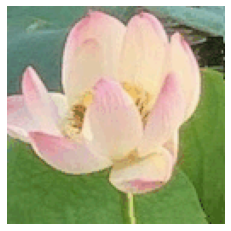

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
im=Image.open('FLM/lotus.png')
#imc=np.array(im.convert('L'))[500:756,500:756]
imc=np.array(im.convert('L'))
plt.imshow(im)
plt.axis('off')
plt.show()

### フィルターによる畳み込み計算(scipy.signal利用）

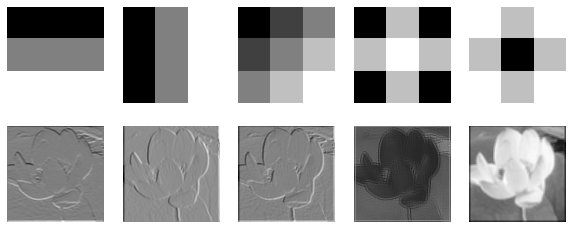

In [3]:
from scipy import signal
imgs=[]
num=5
fig, ax = plt.subplots(ncols=num,nrows=2, figsize=(10,4))

for i in range(num):
    imca=signal.convolve2d(imc,wi[i])
    imgs.append(imca)
    ax[0,i].imshow(wi[i],cmap='gray')
    ax[0,i].axis('off')
    ax[1,i].imshow(imca,cmap='gray')
    ax[1,i].axis('off')
plt.show()

### 線型結合してストライド２で最大値プーリング

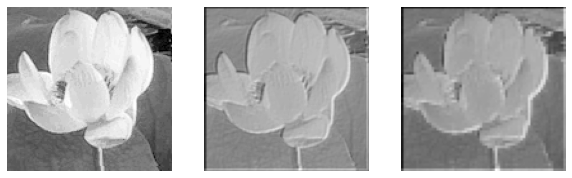

In [4]:
from skimage import measure
imgsum=np.array(imgs).sum(axis=0)
fig, ax = plt.subplots(ncols=3,nrows=1, figsize=(10,5))
ax[0].imshow(imc,cmap='gray')
ax[0].axis('off')
ax[1].imshow(imgsum,cmap='gray')
ax[1].axis('off')
ax[2].imshow(measure.block_reduce(imgsum, (2,2), np.max),cmap='gray')
ax[2].axis('off')
plt.show()

img_mpx=measure.block_reduce(imgsum, (2,2), np.max)

### 上の畳み込みとダウンサイジング・プーリングを繰り返す。

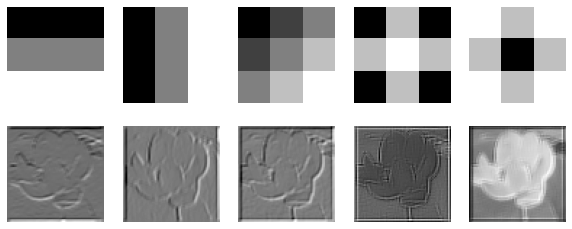

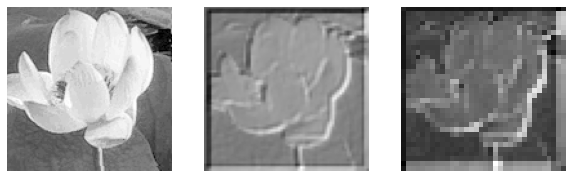

In [5]:
imgs=[]
num=5
fig, ax = plt.subplots(ncols=num,nrows=2, figsize=(10,4))
for i in range(num):
    imca=signal.convolve2d(img_mpx,wi[i])
    imgs.append(imca)
    ax[0,i].imshow(wi[i],cmap='gray')
    ax[0,i].axis('off')
    ax[1,i].imshow(imca,cmap='gray')
    ax[1,i].axis('off')
plt.show()
imgsum=np.array(imgs).sum(axis=0)
fig, ax = plt.subplots(ncols=3,nrows=1, figsize=(10,5))
ax[0].imshow(imc,cmap='gray')
ax[0].axis('off')
ax[1].imshow(imgsum,cmap='gray')
ax[1].axis('off')
ax[2].imshow(measure.block_reduce(imgsum, (2,2), np.max),cmap='gray')
ax[2].axis('off')
plt.show()

img_mpx=measure.block_reduce(imgsum, (2,2), np.max)

### End of script